<a href="https://colab.research.google.com/github/TrongHvDev/AI/blob/main/Week_11/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [65]:
(train_X, train_Y),(test_X, test_Y) = fashion_mnist.load_data()

In [4]:
train_X.shape

(60000, 28, 28)

In [5]:
test_X.shape

(10000, 28, 28)

Text(0.5, 1.0, 'So:8')

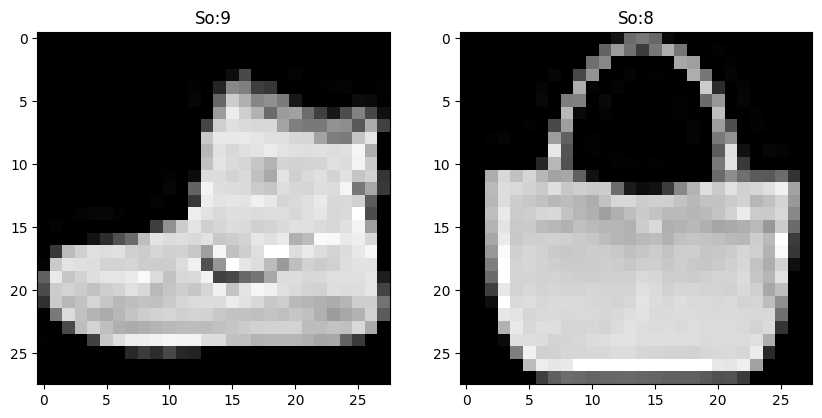

In [20]:
plt.figure(figsize = [10, 10])
plt.subplot(121)  # equivalent to: plt.subplot(1, 2, 1)
plt.imshow(train_X[0], cmap = 'gray')
plt.title('So:{}'.format(train_Y[0]))

plt.subplot(122)
plt.imshow(train_X[100], cmap = 'gray')
plt.title('So:{}'.format(train_Y[100]))

In [66]:
train_X = train_X.reshape(60000, 28, 28, 1)
test_X = test_X.reshape(10000, 28, 28, 1)
train_X.shape
test_X.shape

(10000, 28, 28, 1)

In [67]:
train_X = train_X.astype('float32') /255
test_X = test_X.astype('float32') /255

In [68]:
from keras.utils import to_categorical
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras import losses
batch_size = 64
epochs = 20
classes = 10
loss = losses

In [70]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape = (28, 28, 1), padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(64, (3, 3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3, 3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

In [71]:
#bo ANN de phan loai
model.add(Flatten())    #chuyen anh thanh vecto, dua qua mang ANN
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax')) #classes = 10

In [72]:
from keras import optimizers
model.compile(loss = loss.categorical_crossentropy, optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                 

In [73]:
train = model.fit(train_X, train_Y, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/20
938/938 [==============================] - 125s 132ms/step - loss: 0.4365 - accuracy: 0.8406
Epoch 2/20
938/938 [==============================] - 121s 128ms/step - loss: 0.2706 - accuracy: 0.9017
Epoch 3/20
938/938 [==============================] - 121s 129ms/step - loss: 0.2251 - accuracy: 0.9165
Epoch 4/20
938/938 [==============================] - 121s 129ms/step - loss: 0.1966 - accuracy: 0.9276
Epoch 5/20
938/938 [==============================] - 121s 129ms/step - loss: 0.1713 - accuracy: 0.9361
Epoch 6/20
938/938 [==============================] - 122s 130ms/step - loss: 0.1461 - accuracy: 0.9448
Epoch 7/20
938/938 [==============================] - 121s 129ms/step - loss: 0.1262 - accuracy: 0.9527
Epoch 8/20
938/938 [==============================] - 120s 128ms/step - loss: 0.1081 - accuracy: 0.9599
Epoch 9/20
938/938 [==============================] - 120s 128ms/step - loss: 0.0936 - accuracy: 0.9655
Epoch 10/20
938/938 [==============================] - 120s 128m

In [75]:
model.save('/content/drive/MyDrive/AI/Backup_AI/fashion_mnist_cnn.h5')

In [76]:
eval = model.evaluate(test_X, test_Y, verbose = 0)  #verbose = 0: khong hien thi train
print('Test loss: ', eval[0])
print('Test accuracy: ', eval[1])

Test loss:  0.43388262391090393
Test accuracy:  0.9196000099182129


Text(0.5, 1.0, 'Training & Testing Accuracy')

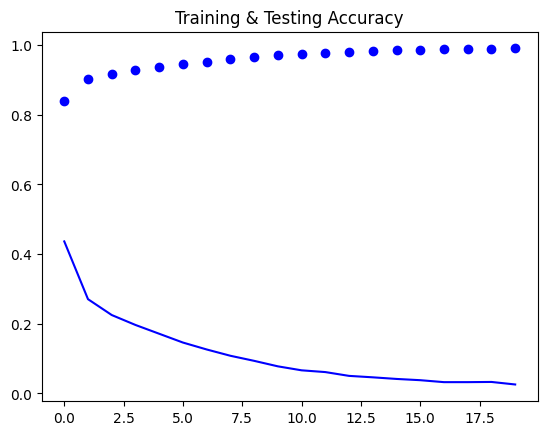

In [78]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')   # 'bo' la dau tron
plt.plot(epochs, loss, 'b', label = 'Test Accuracy')
plt.title('Training & Testing Accuracy')